In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader.data as reader

In [41]:
data = reader.get_data_yahoo('LVGO')
df = data.reset_index()
# df['Date']
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-07-25,45.459999,37.740002,40.509998,38.099998,14798200,38.099998
1,2019-07-26,40.500000,37.259998,37.750000,38.119999,2633100,38.119999
2,2019-07-29,42.000000,38.223000,38.840000,41.630001,1410600,41.630001
3,2019-07-30,42.799999,40.099998,41.459999,41.000000,910400,41.000000
4,2019-07-31,45.680000,41.110001,41.110001,44.250000,2864600,44.250000
...,...,...,...,...,...,...,...
258,2020-08-03,136.860001,128.100006,131.240005,136.630005,4608700,136.630005
259,2020-08-04,149.839996,138.179993,140.970001,144.529999,10867300,144.529999
260,2020-08-05,150.000000,124.129997,149.899994,128.059998,31630500,128.059998
261,2020-08-06,137.399994,131.520004,135.089996,134.350006,8022500,134.350006


In [42]:
# df[["Date","Close"]]

In [43]:
# Select only the important features i.e. the date and price
df = df[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
df = df.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
df.head(5)

,ds,y
0,2019-07-25,38.099998
1,2019-07-26,38.119999
2,2019-07-29,41.630001
3,2019-07-30,41.000000
4,2019-07-31,44.250000


In [44]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df) # fit the model using all data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


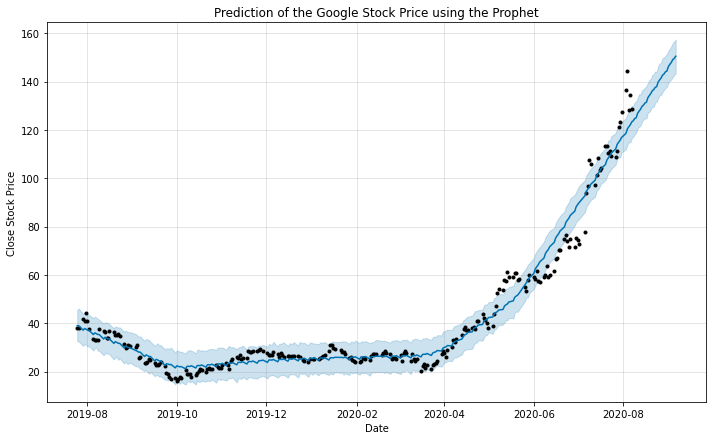

In [49]:
future = m.make_future_dataframe(periods=30) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

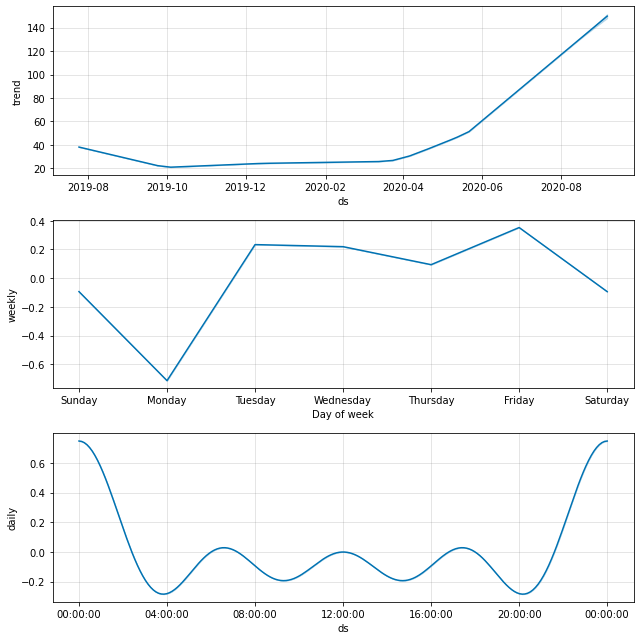

In [50]:
m.plot_components(prediction)
plt.show()